# Astucia Naval

## Importar las librerías a usar

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Graficar tablero en matplotlib

Función para graficar un tablero de juego dadas dos matrices, una correspondiente a los barcos y la otra a los ataques.
Para la matriz de **barcos**:



*   Un espacio sin barco y no atacado es representado por un 0 (int)
*   Un espacio con barco y no atacado es representado por un 1 (int)
*   Un espacio con barco y no atacado es representado por un 2 (int)
*   Un espacio con barco atacado es representado por un 3 (int)

Para la matriz de **ataques**:


*   Un espacio no atacado es representado por un 0 (int)
*   Un espacio atacado que no impactó a ningún barco es representado por un 1 (int)

*   Un espacio atacado que no impactó a ningún barco es representado por un 2 (int)

In [ ]:
def graficar_tablero(BARCOS, ATAQUE):
  """
  Función para graficar un tablero de juego dadas dos matrices, una correspondiente a los barcos y la otra a los ataques.
Para la matriz de barcos:

*   Un espacio sin barco y no atacado es representado por un 0 (int)
*   Un espacio con barco y no atacado es representado por un 1 (int)
*   Un espacio con barco y no atacado es representado por un 2 (int)
*   Un espacio con barco atacado es representado por un 3 (int)

Para la matriz de **ataques**:


*   Un espacio no atacado es representado por un 0 (int)
*   Un espacio atacado que no impactó a ningún barco es representado por un 1 (int)

*   Un espacio atacado que no impactó a ningún barco es representado por un 2 (int)
  """
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  fig.subplots_adjust(left=0,bottom=0,top=1,right=1)
  left=np.arange(10)
  height=np.ones(10)
  zs=height*10
  B_Color = []
  # Grafica los tableros linea por línea
  for i in range(10):
    A_Color = []
    # Analiza las matrices para asignar colores
    for j in range(10):
      if BARCOS[i][j]==0:
        B_Color.append('#00FFFF')
      elif BARCOS[i][j]==1:
        B_Color.append('#999999')
      elif BARCOS[i][j]==2:
        B_Color.append('b')
      else:
        B_Color.append('r')
    #
    for j in range(10):
      if ATAQUE[i][j]==0:
        A_Color.append('c')
      elif ATAQUE[i][j]==1:
        A_Color.append('b')
      else:
        A_Color.append('r')
    ax.bar(left,height-0.1,zs,zdir='y',color=A_Color,bottom=height*(11-i))
    #ax.bar(left,height-0.1,zs*0,zdir='z',color=B_Color,bottom=height*(9-i))
    
    ax.bar(np.arange(14)-2,np.ones(14)*14.,-1,width=1.1,zdir='x',color='w',align='edge')
  _x = np.arange(10)
  _y = np.arange(10)
  _xx, _yy = np.meshgrid(_x, _y)
  x, y = _xx.ravel(), _yy.ravel()
  bottom = np.zeros_like(x)
  top = bottom +0.1 
  top = [(top[i+j] + 0.2*(BARCOS[i][j]==1)) for i in range (10) for j in range(10)]
  ax.bar3d(x-0.5, y, bottom, 0.8, 0.7, top, shade=True, color = B_Color)#(left,height-0.1,zs*0,zdir='z',color=A_Color,bottom=height*(9-i))
  ax.set_xlim(-1,10)
  ax.set_ylim(0,14)
  ax.set_zlim(0,11)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_zticks([])
  ax.view_init(30, 280)
  plt.plot(np.arange(13)-2,np.ones(13)*12.5,np.ones(13)*0,'k')
  for i in range(10):
    #Horizontal piso
    ax.text(i-0.2,11,0,str(i))
    #Horizontal ataque
    #Vertical piso
    ax.text(i-0.3,11,12,str(i))
    ax.text(9.5,i,0,str(9-i),fontsize=9)
    #Verical ataque
    ax.text(10.5,0,0.9*i+8.5,str(9-i),fontsize=9)
  ax.text(-2,37,0,"ASTUCIA NAVAL",fontsize=12)
  plt.show() 

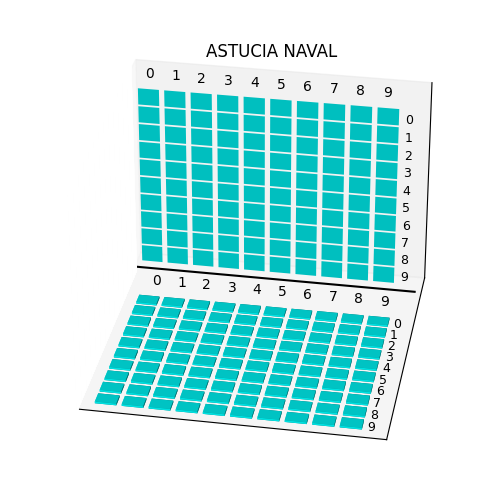

In [ ]:
graficar_tablero(np.zeros(shape=(10,10)),np.zeros(shape=(10,10)))

## ¿Cómo imprimir un tablero de astucia naval con el comando print?

Se deben tener dos matrices, una correspondiente a los barcos y la otra a los ataques.
Para la matriz de **barcos**:



*   Un espacio sin barco y no atacado es representado por un 0 (int)
*   Un espacio con barco y no atacado es representado por un 1 (int)
*   Un espacio con barco y no atacado es representado por un 2 (int)
*   Un espacio con barco atacado es representado por un 3 (int)

Para la matriz de **ataques**:



*   Un espacio no atacado es representado por un 0 (int)
*   Un espacio atacado que no impactó a ningún barco es representado por un 1 (int)

*   Un espacio atacado que no impactó a ningún barco es representado por un 2 (int)

Se crean dos funciones auxiliares, `convertir_A` y `convertir_A`, las cuales toman una matriz y coordenadas `i` `j` de la misma. Convierten el valor numérico en un caracter según las convenciones dadas arriba para que al imprimir el tablero se vea más esrtilizado.

Se crea la función imprimit_tablero, la cuál imprime un tablero N*N con N establecido por defecto en 10 para el
  juego de astucia Naval.
  Habrá un tablero frontal de ataque y uno diagonal de posicionamiento de barcos. 
  
  Para el tablero de barcos:
  Donde hay una posición de un barco sin atacar se pone la letra B. Donde hay una
  posición de barco atacado se pone X. Donde hay mar se deja vacío y donde se atacó
  pero no había barco se pone O.


  Para el tablero de ataque:
  Donde no se ha atacado se deja vacío, donde se atacó y no había barco se deja O
  y donde se atacó y había parte de un barco se pone X





In [ ]:
# EN CASO DE NO DESEAR IMPRIMIR CON MATPLOTLIB USAR LAS SIGUIENTES FUNCIONES
# EN LUGAR DE graficar_tablero

def convertir_A(ATAQUE,i,j):
  """
  Convierte la posición i,j de una materiz un enteron 0 en un espacio en blanco, un entero 1 en el caracter O y otro dato en el caracter X

  >>>convertir_A([[0,0,1],[0,2,1],[0,0,1]],1,2)
  0
  """
  if ATAQUE[i][j]==0:
    return(" ")
  elif ATAQUE[i][j]==1:
    return("O")
  else:
    return("X")


def convertir_B(BARCOS,i,j):
  """
  Convierte la posición i,j de una materiz un enteron 0 en un espacio en blanco,
  un entero 1 en el caracter B, un entero 2 en el caracter O y otro dato en el caracter X

  >>>convertir_A([[0,3,1],[0,2,1],[3,0,1]],1,2)
  B
  """
  if BARCOS[i][j]==0:
    return(" ")
  elif BARCOS[i][j]==1:
    return("B")
  elif BARCOS[i][j]==2:
    return("0")
  else:
    return("X")



def imprimit_tablero(BARCOS, ATAQUE):
  """
  Función que imprime un tablero N*N con N establecido por defecto en 10 para el
  juego de astucia Naval.
  Habrá un tablero frontal de ataque y uno diagonal de posicionamiento de barcos. 
  
  Para el tablero de barcos:
  Donde hay una posición de un barco sin atacar se pone la letra B. Donde hay una
  posición de barco atacado se pone X. Donde hay mar se deja vacío y donde se atacó
  pero no había barco se pone O.


  Para el tablero de ataque:
  Donde no se ha atacado se deja vacío, donde se atacó y no había barco se deja O
  y donde se atacó y había parte de un barco se pone X

  >>>import numpy as np
  >>>imprimit_tablero(np.random.randint(0,3, size=(10,10)), np.random.randint(0,3, size=(10,10)))
-----------------------------------------
| O | X | X |   |   | X | X | O |   | X |
-----------------------------------------
| X |   | X |   |   | O | O |   |   | X |
-----------------------------------------
|   | X | O | X |   | X | O | O |   |   |
-----------------------------------------
| X |   | X | O | O | X | X | X |   | X |
-----------------------------------------
| O |   |   | O | X | X | X | O | O |   |
-----------------------------------------
|   | O | O |   |   | O |   |   |   | O |
-----------------------------------------
| X | X |   | O | O | O |   | O |   | X |
-----------------------------------------
| O | O | O |   | X |   |   | X | X |   |
-----------------------------------------
| X | O | X | O | O | X | O | X | O |   |
-----------------------------------------
| X | O |   | X |   | X |   | X |   | O |
-----------------------------------------
\ B \ B \ X \ 0 \ X \ B \ 0 \   \ X \ B \ 
 -----------------------------------------
 \ X \ 0 \ X \ 0 \ 0 \ B \   \ 0 \ X \ B \ 
  -----------------------------------------
  \ B \ 0 \ 0 \   \   \   \ 0 \ 0 \ 0 \ B \ 
   -----------------------------------------
   \   \   \ X \ 0 \ X \ B \ B \ X \ X \ B \ 
    -----------------------------------------
    \ 0 \ X \ X \ B \   \ X \ X \ X \ 0 \ 0 \ 
     -----------------------------------------
     \ X \ B \ X \ X \ 0 \ B \ B \   \ B \ B \ 
      -----------------------------------------
      \ B \ 0 \   \ 0 \ 0 \   \ 0 \ 0 \ B \ X \ 
       -----------------------------------------
       \ 0 \ 0 \   \ 0 \ X \   \ X \ B \ B \ B \ 
        -----------------------------------------
        \ B \   \   \ 0 \ X \ X \ 0 \ B \   \ B \ 
         -----------------------------------------
         \ X \   \   \   \ X \ B \   \ 0 \ B \ X \ 
          -----------------------------------------
  """
  print("-"*41)
  for i in range(10):
   for j in range(10):
      print("| "+convertir_A(ATAQUE,i,j)+" ",end="")
   print("|")
   print("-"*41)
  for i in range(10):
   print(i*" ",end="")
   for j in range(10):
      print("\ "+convertir_B(BARCOS,i,j)+" ",end="",sep="")
   print("\ ")
   print((i+1)*" ","-"*41,sep="")

In [ ]:
help(imprimit_tablero)

Help on function imprimit_tablero in module __main__:

imprimit_tablero(BARCOS, ATAQUE)
      Función que imprime un tablero N*N con N establecido por defecto en 10 para el
      juego de astucia Naval.
      Habrá un tablero frontal de ataque y uno diagonal de posicionamiento de barcos. 
      
      Para el tablero de barcos:
      Donde hay una posición de un barco sin atacar se pone la letra B. Donde hay una
      posición de barco atacado se pone X. Donde hay mar se deja vacío y donde se atacó
      pero no había barco se pone O.
    
    
      Para el tablero de ataque:
      Donde no se ha atacado se deja vacío, donde se atacó y no había barco se deja O
      y donde se atacó y había parte de un barco se pone X
    
      >>>import numpy as np
      >>>imprimit_tablero(np.random.randint(0,3, size=(10,10)), np.random.randint(0,3, size=(10,10)))
    -----------------------------------------
    | O | X | X |   |   | X | X | O |   | X |
    ----------------------------------------

In [ ]:
imprimit_tablero(np.random.randint(0,4, size=(10,10)), np.random.randint(0,3, size=(10,10)))

-----------------------------------------
| O | X | X |   |   | X | X | O |   | X |
-----------------------------------------
| X |   | X |   |   | O | O |   |   | X |
-----------------------------------------
|   | X | O | X |   | X | O | O |   |   |
-----------------------------------------
| X |   | X | O | O | X | X | X |   | X |
-----------------------------------------
| O |   |   | O | X | X | X | O | O |   |
-----------------------------------------
|   | O | O |   |   | O |   |   |   | O |
-----------------------------------------
| X | X |   | O | O | O |   | O |   | X |
-----------------------------------------
| O | O | O |   | X |   |   | X | X |   |
-----------------------------------------
| X | O | X | O | O | X | O | X | O |   |
-----------------------------------------
| X | O |   | X |   | X |   | X |   | O |
-----------------------------------------
\ B \ B \ X \ 0 \ X \ B \ 0 \   \ X \ B \ 
 -----------------------------------------
 \ X \ 0 \ X \ 0 \ 0 \ B \   \ 0

In [ ]:
# FUNCIONES PARA EL JUEGO

def matriz_vacia():
  M = []
  for i in range(10):
    M.append([])
    for j in range(10):
      M[i].append(0)
  return(M)


In [ ]:
def ubicar_barcos(BARCOS, barco, horizontal):
  """
  Función para ubicar un barco en una celda 10X10

  barco: tamaño del barco (menor a 9)

  horizontal: booleano
  """
  if horizontal == True:
    fila = np.random.randint(10-barco)
    columna = np.random.randint(10)
    while sum(np.array(BARCOS)[fila:fila+barco,columna])>0:
      fila = np.random.randint(10-barco)
      columna = np.random.randint(10)
    for i in range(fila,fila+barco,1):
      BARCOS[i][columna]=1
  else:
    columna = np.random.randint(10-barco)
    fila = np.random.randint(10)
    while sum(BARCOS[fila][columna:columna+barco])>0:
      columna = np.random.randint(10-barco)
      fila = np.random.randint(10)
    for i in range(columna,columna+barco,1):
      BARCOS[fila][i]=1

In [ ]:
def ubicar_barcos_jugador(BARCOS, barco, horizontal):
  """
  Función para ubicar un barco en una celda 10X10

  barco: tamaño del barco (menor a 9)

  horizontal: booleano
  """
  if horizontal == True:
    fila = int(input("Ingrese la posición de la FILA en que va a poner la popa del barco (Entre 0 y {})\t".format(10-barco)))
    columna = int(input("Ingrese la posición de la COLUMNA en que va a poner la popa del barco (Entre 0 y 9)\t"))
    while sum(np.array(BARCOS)[fila:fila+barco,columna])>0:
      fila = int(input("Se cruzaría con otro barco, ingrese otro valor para la FILA (Entre 0 y {})\t".format(10-barco)))
      columna = int(input("Se cruzaría con otro barco, ingrese otro valor para la COLUMNA (Entre 0 y 9)\t"))
    for i in range(fila,fila+barco,1):
      BARCOS[i][columna]=1
  else:
    fila = int(input("Ingrese la posición de la FILA en que va a poner la popa del barco (Entre 0 y 9)\t"))
    columna = int(input("Ingrese la posición de la COLUMNA en que va a poner la popa del barco (Entre 0 y {})\t".format(10-barco)))
    while sum(BARCOS[fila][columna:columna+barco])>0:
      fila = int(input("Se cruzaría con otro barco, ingrese otro valor para la FILA (Entre 0 y 9)\t"))
      columna = int(input("Se cruzaría con otro barco, ingrese otro valor para la COLUMNA (Entre 0 y {})\t".format(10-barco)))
    for i in range(columna,columna+barco,1):
      BARCOS[fila][i]=1

In [ ]:
def recibir_y_hacer_ataque(BARCOS, ATAQUE):
  VALIDO = 0
  while VALIDO == 0:
    fila_a = int(input("¿A qué fila diriges el ataque? (Número de 0 a 9): "))
    columna_a = int(input("¿A qué columna diriges el ataque? (Número de 0 a 9): "))
    if BARCOS[fila_a][columna_a] == 0:
      print("No habían barcos")
      BARCOS[fila_a][columna_a] = 2
      ATAQUE[fila_a][columna_a] = 1
      VALIDO = 1
    elif BARCOS[fila_a][columna_a] == 1:
      print("¡¡¡IMPACTO!!!")
      BARCOS[fila_a][columna_a] = 3
      ATAQUE[fila_a][columna_a] = 2
      VALIDO = 1
    else:
      print("Ataque no válido, intenta nuevamente")
  return(BARCOS, ATAQUE)

In [ ]:
def recibir_y_hacer_ataque_PC(BARCOS, ATAQUE):
  BARCOS = BARCOS[:]
  ATAQUE = ATAQUE[:]
  VALIDO = 0
  while VALIDO == 0:
    fila_a = np.random.randint(10)
    columna_a = np.random.randint(10)
    if BARCOS[fila_a][columna_a] == 0:
      print("Te atacó el computador en las posiciones fila: {}, columna: {} pero no habían barcos".format(fila_a,columna_a))
      BARCOS[fila_a][columna_a] = 2
      ATAQUE[fila_a][columna_a] = 1
      VALIDO = 1
    elif BARCOS[fila_a][columna_a] == 1:
      print("Te atacó el computador en las posiciones fila: {}, columna: {} e impactó con uno de tus barcos".format(fila_a,columna_a))
      BARCOS[fila_a][columna_a] = 3
      ATAQUE[fila_a][columna_a] = 2
      VALIDO = 1
  return(BARCOS, ATAQUE)

In [ ]:
def verificar_victoria_single(BARCOS):
  for i in range(10):
    for j in range(10):
      if BARCOS[i][j]==1:
        return(False)

In [ ]:
def verificar_victoria(BARCOS_1, BARCOS_2, JUGADOR_1="Jugador 1", JUGADOR_2="Jugador 2"):
  WIN_1=verificar_victoria_single(BARCOS_1)
  WIN_2=verificar_victoria_single(BARCOS_2)
  FIN = 0
  if WIN_1==True and WIN_2==False:
    print("Ganador", JUGADOR_1)
    FIN = 1
  elif WIN_1==False and WIN_2==True:
    print("Ganador", JUGADOR_2)
    FIN = 1
  elif WIN_1==True and WIN_2==True:
    print("Empate")
    FIN = 1
  return(FIN)  

In [ ]:
# JUEGO

JUGADOR= input("Ingrese el nombre del jugador 1: ")

BARCO_PC = matriz_vacia()
ATAQUE_PC = matriz_vacia()
BARCO_JUGADOR = matriz_vacia()
ATAQUE_JUGADOR = matriz_vacia()

#Ubica barcos del computador
ORIENTACION = [True, False]
for barco in [2,3,3,4,5]:
  POS = ORIENTACION[np.random.randint(0,2)]
  ubicar_barcos(BARCO_PC, barco, POS)

#Ubica barcos jugador
for barco in [2,3,3,4,5]:
  print("\n\nUbicaremos un barco de tamaño",barco)
  horizontal = input("Si desea ubicar su barco vertical ingrese SI, de lo contrario ingrese cualquier otra cosa:\t")
  ubicar_barcos_jugador(BARCO_JUGADOR, barco, horizontal.lower()=="si")


# Imprime franjas para dividir
print("*"*50)
print("*"*50)
print("*"*50)

#Inicio del juego

print("INICIA EL JUEGO, ¡QUE GANE EL MEJOR!")
FIN = 0
while FIN==0:
  # Ataque del jugador
  print("          ATAQUE DE ",JUGADOR)
  BARCO_PC,ATAQUE_JUGADOR = recibir_y_hacer_ataque(BARCO_PC,ATAQUE_JUGADOR)
  #Ataque del PC
  print("          ATAQUE DEL PC ")
  BARCO_JUGADOR,ATAQUE_PC = recibir_y_hacer_ataque_PC(BARCO_JUGADOR,ATAQUE_PC)
  graficar_tablero(BARCO_JUGADOR,ATAQUE_JUGADOR)
  #Verificar victoria
  FIN = verificar_victoria(BARCO_JUGADOR, BARCO_PC, JUGADOR_1=JUGADOR, JUGADOR_2="Computador")
  if FIN == 0:
      print("\n\n")

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def graficar_tablero(BARCOS, ATAQUE):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  fig.subplots_adjust(left=0,bottom=0,top=1,right=1)
  left=np.arange(10)
  height=np.ones(10)
  zs=height*10
  B_Color = []
  # Grafica los tableros linea por línea
  for i in range(10):
    A_Color = []
    # Analiza las matrices para asignar colores
    for j in range(10):
      if BARCOS[i][j]==0:
        B_Color.append('#00FFFF')
      elif BARCOS[i][j]==1:
        B_Color.append('#999999')
      elif BARCOS[i][j]==2:
        B_Color.append('b')
      else:
        B_Color.append('r')
    #
    for j in range(10):
      if ATAQUE[i][j]==0:
        A_Color.append('c')
      elif ATAQUE[i][j]==1:
        A_Color.append('b')
      else:
        A_Color.append('r')
    ax.bar(left,height-0.1,zs,zdir='y',color=A_Color,bottom=height*(11-i))
    #ax.bar(left,height-0.1,zs*0,zdir='z',color=B_Color,bottom=height*(9-i))
    
    ax.bar(np.arange(14)-2,np.ones(14)*14.,-1,width=1.1,zdir='x',color='w',align='edge')
  _x = np.arange(10)
  _y = np.arange(10)
  _xx, _yy = np.meshgrid(_x, _y)
  x, y = _xx.ravel(), _yy.ravel()
  bottom = np.zeros_like(x)
  top = bottom +0.1 
  top = [(top[i+j] + 0.2*(BARCOS[i][j]==1)) for i in range (10) for j in range(10)]
  ax.bar3d(x-0.5, y, bottom, 0.8, 0.7, top, shade=True, color = B_Color)#(left,height-0.1,zs*0,zdir='z',color=A_Color,bottom=height*(9-i))
  ax.set_xlim(-1,10)
  ax.set_ylim(0,14)
  ax.set_zlim(0,11)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_zticks([])
  ax.view_init(30, 280)
  plt.plot(np.arange(13)-2,np.ones(13)*12.5,np.ones(13)*0,'k')
  for i in range(10):
    #Horizontal piso
    ax.text(i-0.2,11,0,str(i))
    #Horizontal ataque
    #Vertical piso
    ax.text(i-0.3,11,12,str(i))
    ax.text(9.5,i,0,str(9-i),fontsize=9)
    #Verical ataque
    ax.text(10.5,0,0.9*i+8.5,str(9-i),fontsize=9)
  ax.text(-2,37,0,"ASTUCIA NAVAL",fontsize=12)
  plt.show() 


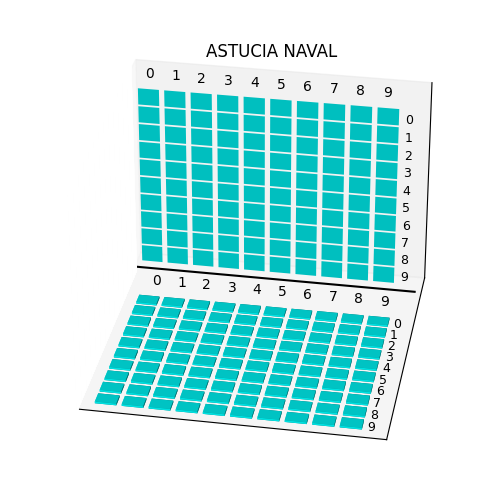

In [ ]:
graficar_tablero(np.zeros(shape=(10,10)),np.zeros(shape=(10,10)))